In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("../Data/raw.csv") 

# 1. Overview

In [64]:
df.shape

(1000, 12)

In [65]:
df.head

<bound method NDFrame.head of     Household_ID         Region      Country Energy_Source  Monthly_Usage_kWh  \
0         H01502  North America          USA         Hydro            1043.49   
1         H02587      Australia    Australia    Geothermal             610.01   
2         H02654  North America          USA       Biomass            1196.75   
3         H01056  South America     Colombia       Biomass             629.67   
4         H00706         Africa        Egypt         Hydro             274.46   
..           ...            ...          ...           ...                ...   
995       H04712           Asia        Japan          Wind            1056.65   
996       H02314  North America          USA          Wind            1182.33   
997       H03215         Europe      Germany          Wind             417.88   
998       H02733      Australia    Australia       Biomass             258.91   
999       H01927      Australia  New Zealand       Biomass             455.84  

In [66]:
df.info

<bound method DataFrame.info of     Household_ID         Region      Country Energy_Source  Monthly_Usage_kWh  \
0         H01502  North America          USA         Hydro            1043.49   
1         H02587      Australia    Australia    Geothermal             610.01   
2         H02654  North America          USA       Biomass            1196.75   
3         H01056  South America     Colombia       Biomass             629.67   
4         H00706         Africa        Egypt         Hydro             274.46   
..           ...            ...          ...           ...                ...   
995       H04712           Asia        Japan          Wind            1056.65   
996       H02314  North America          USA          Wind            1182.33   
997       H03215         Europe      Germany          Wind             417.88   
998       H02733      Australia    Australia       Biomass             258.91   
999       H01927      Australia  New Zealand       Biomass             455.84

In [67]:
df.isnull().sum()

Household_ID         0
Region               0
Country              0
Energy_Source        0
Monthly_Usage_kWh    0
Year                 0
Household_Size       0
Income_Level         0
Urban_Rural          0
Adoption_Year        0
Subsidy_Received     0
Cost_Savings_USD     0
dtype: int64

In [68]:
df.describe(include='all')

,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000
unique,1000,6,25,5,NaN,NaN,NaN,3,2,NaN,2,NaN
top,H01502,Europe,Australia,Wind,NaN,NaN,NaN,Middle,Rural,NaN,No,NaN
freq,1,173,84,227,NaN,NaN,NaN,358,514,NaN,503,NaN
mean,NaN,NaN,NaN,NaN,767.325530,2021.992000,4.480000,NaN,NaN,2015.992000,NaN,248.389850
std,NaN,NaN,NaN,NaN,419.649102,1.419137,2.297581,NaN,NaN,3.973629,NaN,143.127301
min,NaN,NaN,NaN,NaN,50.740000,2020.000000,1.000000,NaN,NaN,2010.000000,NaN,10.420000
25%,NaN,NaN,NaN,NaN,402.730000,2021.000000,2.000000,NaN,NaN,2013.000000,NaN,122.122500
50%,NaN,NaN,NaN,NaN,760.190000,2022.000000,5.000000,NaN,NaN,2016.000000,NaN,242.530000
75%,NaN,NaN,NaN,NaN,1117.747500,2023.000000,6.000000,NaN,NaN,2019.000000,NaN,372.520000


In [69]:

print("Kích thước dữ liệu:", df.shape)
print("\n5 dòng đầu:")
print(df.head())

print("\nThông tin các cột:")
print(df.info())

print("\nSố lượng giá trị null mỗi cột:")
print(df.isnull().sum())

print("\nThống kê mô tả:")
print(df.describe(include='all'))


Kích thước dữ liệu: (1000, 12)

5 dòng đầu:
  Household_ID         Region    Country Energy_Source  Monthly_Usage_kWh  \
0       H01502  North America        USA         Hydro            1043.49   
1       H02587      Australia  Australia    Geothermal             610.01   
2       H02654  North America        USA       Biomass            1196.75   
3       H01056  South America   Colombia       Biomass             629.67   
4       H00706         Africa      Egypt         Hydro             274.46   

   Year  Household_Size Income_Level Urban_Rural  Adoption_Year  \
0  2024               5          Low       Urban           2012   
1  2024               4         High       Rural           2023   
2  2024               8          Low       Rural           2017   
3  2024               7         High       Urban           2023   
4  2022               7       Middle       Rural           2010   

  Subsidy_Received  Cost_Savings_USD  
0               No             10.46  
1           

No null values → Không cần xử lý thiếu dữ liệu.

Household_ID only contain unique values → Removed

Categorial columns like : Region, Country, Energy_Source, Income_Level, Urban_Rural, Subsidy_Received → Need to be properly handled.

Dữ liệu có yếu tố thời gian (Year, Adoption_Year) → Có thể phân tích theo thời gian.

# 2. Preprocess


## Check for outliers

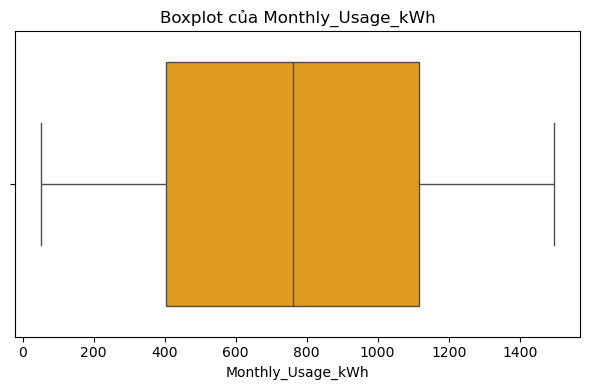

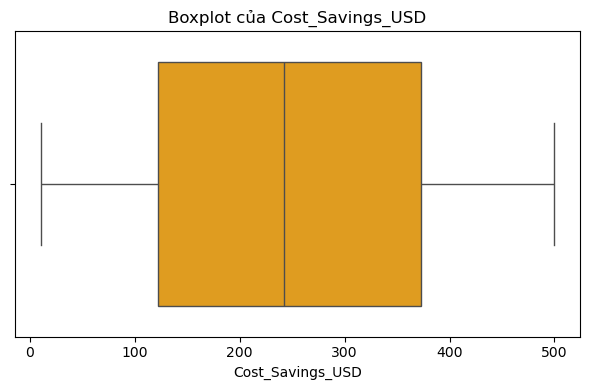

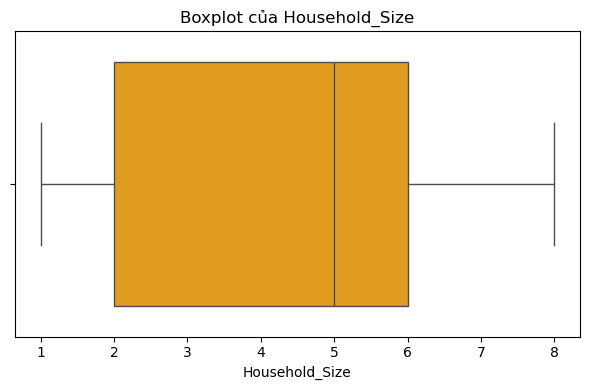

In [70]:
num_cols = ['Monthly_Usage_kWh', 'Cost_Savings_USD', 'Household_Size']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot của {col}")
    plt.tight_layout()
    plt.show()


In [71]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers

for col in num_cols:
    outliers = detect_outliers_iqr(df[col])
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


Monthly_Usage_kWh: 0 outliers (0.00%)
Cost_Savings_USD: 0 outliers (0.00%)
Household_Size: 0 outliers (0.00%)


## Address data anomalies and inconsistencies

In [72]:
print(df[df['Cost_Savings_USD'] <= 0])  # Tiết kiệm âm hoặc 0?
print(df[df['Monthly_Usage_kWh'] <= 0])  # Không sử dụng điện?


Empty DataFrame
Columns: [Household_ID, Region, Country, Energy_Source, Monthly_Usage_kWh, Year, Household_Size, Income_Level, Urban_Rural, Adoption_Year, Subsidy_Received, Cost_Savings_USD]
Index: []
Empty DataFrame
Columns: [Household_ID, Region, Country, Energy_Source, Monthly_Usage_kWh, Year, Household_Size, Income_Level, Urban_Rural, Adoption_Year, Subsidy_Received, Cost_Savings_USD]
Index: []


In [73]:
anomaly_dates = df[df['Adoption_Year'] > df['Year']]
print(anomaly_dates)


Empty DataFrame
Columns: [Household_ID, Region, Country, Energy_Source, Monthly_Usage_kWh, Year, Household_Size, Income_Level, Urban_Rural, Adoption_Year, Subsidy_Received, Cost_Savings_USD]
Index: []


In [74]:
print(df[(df['Household_Size'] < 1) | (df['Household_Size'] > 20)])


Empty DataFrame
Columns: [Household_ID, Region, Country, Energy_Source, Monthly_Usage_kWh, Year, Household_Size, Income_Level, Urban_Rural, Adoption_Year, Subsidy_Received, Cost_Savings_USD]
Index: []


Check lỗi chính tả

In [75]:
print(df['Income_Level'].unique())
print(df['Urban_Rural'].unique())
print(df['Subsidy_Received'].unique())


['Low' 'High' 'Middle']
['Urban' 'Rural']
['No' 'Yes']


In [76]:
df['Income_Level'] = df['Income_Level'].str.strip().str.capitalize()
df['Urban_Rural'] = df['Urban_Rural'].str.strip().str.capitalize()
df['Subsidy_Received'] = df['Subsidy_Received'].str.strip().str.capitalize()


Check trùng lặp

In [77]:
print(df['Household_ID'].duplicated().sum())


0


## Encoding


Category

In [78]:
cat_cols = ['Region', 'Country', 'Energy_Source', 'Income_Level', 'Urban_Rural', 'Subsidy_Received']


In [79]:
income_map = {'Low': 0, 'Middle': 1, 'High': 2}
df['Income_Level_Encoded'] = df['Income_Level'].map(income_map)

df['Urban_Encoded'] = df['Urban_Rural'].map({'Urban': 1, 'Rural': 0})
df['Subsidy_Encoded'] = df['Subsidy_Received'].map({'Yes': 1, 'No': 0})


df_encoded = pd.get_dummies(df, columns=['Region', 'Country', 'Energy_Source'], drop_first=True)



In [80]:
df.Urban_Encoded

0      1
1      0
2      0
3      1
4      0
      ..
995    1
996    0
997    0
998    1
999    1
Name: Urban_Encoded, Length: 1000, dtype: int64

Numerical

In [81]:
num_cols = ['Monthly_Usage_kWh', 'Household_Size', 'Cost_Savings_USD', 'Adoption_Year']


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])


In [83]:
for col in num_cols:
    df_scaled[col + '_scaled'] = scaler.fit_transform(df[[col]])


## Create clean and structured data for analysis

In [84]:
cols_to_drop = ['Household_ID', 'Region', 'Country', 'Energy_Source', 
                'Income_Level', 'Urban_Rural', 'Subsidy_Received']
df_clean = df.drop(columns=cols_to_drop)


In [85]:
from sklearn.preprocessing import StandardScaler

# Cột số
num_cols = ['Monthly_Usage_kWh', 'Household_Size', 'Cost_Savings_USD', 'Adoption_Year']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Region', 'Country', 'Energy_Source'], drop_first=True)

# Encode ordinal & binary
df_encoded['Income_Level_Encoded'] = df_encoded['Income_Level'].map({'Low': 0, 'Middle': 1, 'High': 2})
df_encoded['Urban_Encoded'] = df_encoded['Urban_Rural'].map({'Urban': 1, 'Rural': 0})
df_encoded['Subsidy_Encoded'] = df_encoded['Subsidy_Received'].map({'Yes': 1, 'No': 0})

# Drop redundant columns
final_df = df_encoded.drop(columns=['Household_ID', 'Income_Level', 'Urban_Rural', 'Subsidy_Received'])

# Replace scaled columns
final_df[num_cols] = df_scaled[num_cols]


In [86]:
final_df.to_csv("../Data/cleaned_data.csv", index=False)


In [87]:
final_df.to_pickle("../Data/cleaned_data.pkl")
